## 计数变量回归

####  黄荣贵（复旦大学社会学系）

In [1]:
library(foreign)
couart <- read.dta("datasets/couart2.dta")
head(couart)

art,fem,mar,kid5,phd,ment
0,Men,Married,0,2.52,7
0,Women,Single,0,2.05,6
0,Women,Single,0,3.75,6
0,Men,Married,1,1.18,3
0,Women,Single,0,3.75,26
0,Women,Married,2,3.59,2


In [2]:
m1 <- glm(art ~ fem + ment, data=couart, family=poisson)
summary(m1)


Call:
glm(formula = art ~ fem + ment, family = poisson, data = couart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6094  -1.5746  -0.3891   0.5651   5.7868  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.34909    0.04191   8.329  < 2e-16 ***
femWomen    -0.18445    0.05235  -3.523 0.000426 ***
ment         0.02510    0.00193  13.005  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1817.4  on 914  degrees of freedom
Residual deviance: 1657.0  on 912  degrees of freedom
AIC: 3330.7

Number of Fisher Scoring iterations: 5


In [3]:
exp(coef(m1))

(Intercept)    femWomen        ment 
  1.4177815   0.8315604   1.0254201

In [4]:
couart$predArt = predict(m1, type="response")
head(couart)

art,fem,mar,kid5,phd,ment,predArt
0,Men,Married,0,2.52,7,1.690137
0,Women,Single,0,2.05,6,1.370610
0,Women,Single,0,3.75,6,1.370610
0,Men,Married,1,1.18,3,1.528674
0,Women,Single,0,3.75,26,2.264385
0,Women,Married,2,3.59,2,1.239672


### 评估模型拟合度

In [5]:
(meanPred = sapply(0:9, function(m) mean(dpois(m, couart$predArt))))

[1] 0.2052027736 0.3114204906 0.2456201777 0.1359469614 0.0606643402
 [6] 0.0240924497 0.0093238329 0.0038190407 0.0017442222 0.0008943331

In [6]:
(obsPred = prop.table(table(couart$art)))


          0           1           2           3           4           5 
0.300546448 0.268852459 0.194535519 0.091803279 0.073224044 0.029508197 
          6           7           8           9          10          11 
0.018579235 0.013114754 0.001092896 0.002185792 0.001092896 0.001092896 
         12          16          19 
0.002185792 0.001092896 0.001092896 

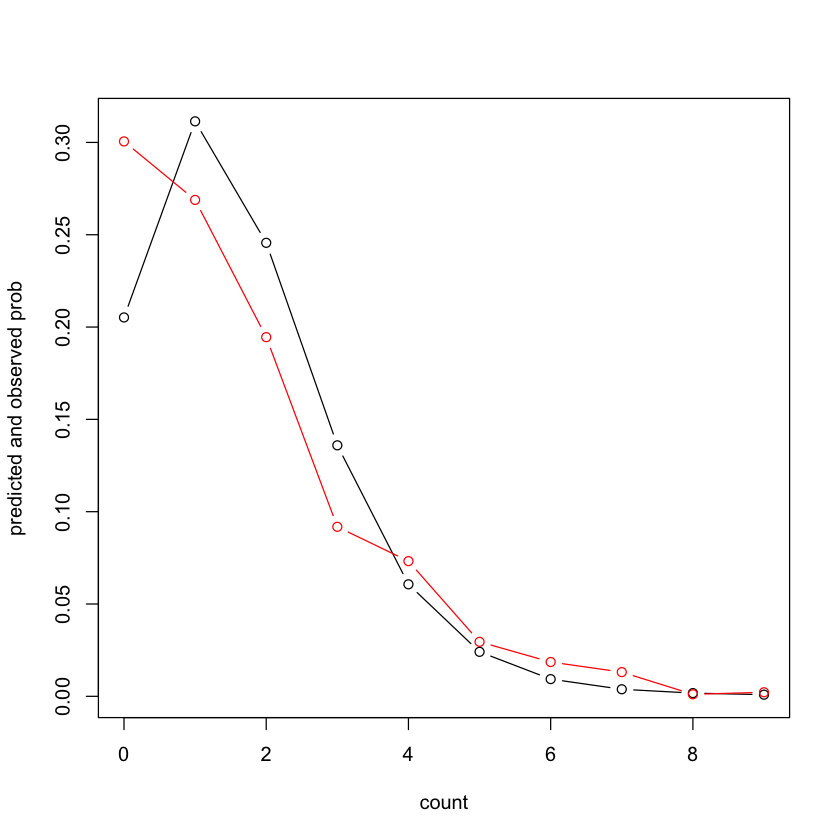

In [7]:
plot(0:9, meanPred, type="b", xlab="count", 
     ylab="predicted and observed prob")
lines(0:9, obsPred[1:10], col="red", type="b")

### 负二项回归

In [8]:
library(MASS)
mod_nb <- glm.nb(art ~  fem + mar + kid5 + phd + ment, data=couart)
summary(mod_nb)


Call:
glm.nb(formula = art ~ fem + mar + kid5 + phd + ment, data = couart, 
    init.theta = 2.264387695, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1678  -1.3617  -0.2806   0.4476   3.4524  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.256144   0.137348   1.865 0.062191 .  
femWomen    -0.216418   0.072636  -2.979 0.002887 ** 
marMarried   0.150489   0.082097   1.833 0.066791 .  
kid5        -0.176415   0.052813  -3.340 0.000837 ***
phd          0.015271   0.035873   0.426 0.670326    
ment         0.029082   0.003214   9.048  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(2.2644) family taken to be 1)

    Null deviance: 1109.0  on 914  degrees of freedom
Residual deviance: 1004.3  on 909  degrees of freedom
AIC: 3135.9

Number of Fisher Scoring iterations: 1


              Theta:  2.264 
          Std. Err.:  0.271 

 2 x log-l

In [9]:
library(pscl)

# vignette("countreg", package="pscl")

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


In [10]:
odTest(mod_nb)

Likelihood ratio test of H0: Poisson, as restricted NB model:
n.b., the distribution of the test-statistic under H0 is non-standard
e.g., see help(odTest) for details/references

Critical value of test statistic at the alpha= 0.05 level: 2.7055 
Chi-Square Test Statistic =  180.196 p-value = < 2.2e-16 


检验显著，优先选择负二项回归。

### 零膨胀回归

默认情况下是零膨胀泊松回归。具体而言，零膨胀部分使用logit回归，而计数部分使用泊松回归。

In [11]:
zip = zeroinfl(art ~ fem + mar + kid5 + phd + ment | fem + mar + kid5 + phd + ment, data = couart)
summary(zip)


Call:
zeroinfl(formula = art ~ fem + mar + kid5 + phd + ment | fem + mar + 
    kid5 + phd + ment, data = couart)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-2.3253 -0.8652 -0.2826  0.5404  7.2976 

Count model coefficients (poisson with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.640838   0.121307   5.283 1.27e-07 ***
femWomen    -0.209145   0.063405  -3.299 0.000972 ***
marMarried   0.103751   0.071111   1.459 0.144565    
kid5        -0.143320   0.047429  -3.022 0.002513 ** 
phd         -0.006166   0.031008  -0.199 0.842378    
ment         0.018098   0.002294   7.888 3.07e-15 ***

Zero-inflation model coefficients (binomial with logit link):
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.577059   0.509386  -1.133  0.25728   
femWomen     0.109746   0.280082   0.392  0.69518   
marMarried  -0.354014   0.317611  -1.115  0.26502   
kid5         0.217097   0.196482   1.105  0.26919   
phd          0.001274   0.

模型预测值：

In [12]:
couart$predY = predict(zip)

预测计数成分的均值（已剔除0成分）

In [13]:
couart$predCount = predict(zip, type="count")

预测观察到零成分的概率。

In [14]:
couart$predZ = predict(zip, type="zero")

In [15]:
head(couart)

art,fem,mar,kid5,phd,ment,predArt,predY,predCount,predZ
0,Men,Married,0,2.52,7,1.690137,2.037956,2.353103,0.13392842
0,Women,Single,0,2.05,6,1.370610,1.323124,1.694927,0.21936229
0,Women,Single,0,3.75,6,1.370610,1.308704,1.677253,0.21973346
0,Men,Married,1,1.18,3,1.528674,1.439982,1.912261,0.24697429
0,Women,Single,0,3.75,26,2.264385,2.363233,2.408759,0.01890012
0,Women,Married,2,3.59,2,1.239672,0.854771,1.300650,0.34281234


观察到该取值的概率

In [16]:
predP = predict(zip, type="prob")
head(predP)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.2162690,0.1937560,0.2279639,0.17880748,0.10518810,0.049503684,0.019414543,0.006526345,0.0019196452,5.019025e-04,1.181028e-04,2.526437e-05,4.954139e-06,8.967384e-07,1.507227e-07,2.364440e-08,3.477356e-09,4.813281e-10,6.292303e-11,7.792861e-12
2,0.3626973,0.2429423,0.2058847,0.11631983,0.04928840,0.016708046,0.004719819,0.001142821,0.0002421248,4.559820e-05,7.728561e-06,1.190849e-06,1.682002e-07,2.192977e-08,2.654955e-09,2.999969e-10,3.177955e-11,3.168471e-12,2.983515e-13,2.661494e-14
3,0.3655549,0.2445794,0.2051107,0.11467420,0.04808441,0.016129943,0.004508999,0.001080390,0.0002265110,4.221291e-05,7.080172e-06,1.079567e-06,1.508923e-07,1.946804e-08,2.332345e-09,2.607955e-10,2.733875e-11,2.697294e-12,2.513358e-13,2.218703e-14
4,0.3582308,0.2127514,0.2034182,0.12966290,0.06198734,0.023707199,0.007555727,0.002064075,0.0004933813,1.048304e-04,2.004632e-05,3.484891e-06,5.553353e-07,8.168817e-08,1.115779e-08,1.422441e-09,1.700050e-10,1.912317e-11,2.031584e-12,2.044694e-13
5,0.1071273,0.2125181,0.2559524,0.20550920,0.12375553,0.059619449,0.023934814,0.008236171,0.0024798688,6.637118e-04,1.598722e-04,3.500850e-05,7.027254e-06,1.302074e-06,2.240273e-07,3.597518e-08,5.415971e-09,7.673982e-10,1.026932e-10,1.301911e-11
6,0.5218005,0.2328010,0.1513963,0.06563783,0.02134296,0.005551943,0.001203522,0.000223623,0.0000363569,5.254177e-06,6.833844e-07,8.080398e-08,8.758139e-09,8.762517e-10,8.140690e-11,7.058791e-12,5.738134e-13,4.390178e-14,3.172269e-15,2.171585e-16


#### 将dist参数设置为"negbin"则可以得到零膨胀负二项回归。

In [17]:
zinb = zeroinfl(art ~ fem + mar + kid5 + phd + ment | fem + mar + kid5 + phd + ment, data = couart, dist="negbin")
summary(zinb)


Call:
zeroinfl(formula = art ~ fem + mar + kid5 + phd + ment | fem + mar + 
    kid5 + phd + ment, data = couart, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2942 -0.7601 -0.2909  0.4448  6.4155 

Count model coefficients (negbin with log link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.4167465  0.1435966   2.902  0.00371 ** 
femWomen    -0.1955068  0.0755926  -2.586  0.00970 ** 
marMarried   0.0975826  0.0844520   1.155  0.24789    
kid5        -0.1517325  0.0542061  -2.799  0.00512 ** 
phd         -0.0007001  0.0362697  -0.019  0.98460    
ment         0.0247862  0.0034927   7.097 1.28e-12 ***
Log(theta)   0.9763565  0.1354695   7.207 5.71e-13 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.19169    1.32282  -0.145  0.88478   
femWomen     0.63593    0.84892   0.749  0.45379   
marMarried  -1.49947    0.93867  -1.597  0.11017   
kid5 

使用vuong函数可以检验两个非嵌套模型的拟合度。其原假设是两个模型不具有区分度（拟合度相似）。

In [18]:
vuong(mod_nb, zinb)

Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A  p-value
Raw                   -2.241831 model2 > model1 0.012486
AIC-corrected         -1.015385 model2 > model1 0.154961
BIC-corrected          1.939690 model1 > model2 0.026209
